In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Step - 1

In [2]:
df = pd.read_excel("audi.xlsx")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [3]:
df['model'].unique(),df["transmission"].unique(), df["fuelType"].unique()

(array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
        ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
        ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
       dtype=object),
 array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object),
 array(['Petrol', 'Diesel', 'Hybrid'], dtype=object))

In [4]:
model_mapping = {value: index for index, value in enumerate(df['model'].unique())}
df['model'] = df['model'].map(model_mapping)
df.drop(['transmission', 'fuelType'], axis=1, inplace=True)
df.head()

,model,year,price,mileage,tax,mpg,engineSize
0,0,2017,12500,15735,150,55.4,1.4
1,1,2016,16500,36203,20,64.2,2.0
2,0,2016,11000,29946,30,55.4,1.4
3,2,2017,16800,25952,145,67.3,2.0
4,3,2019,17300,1998,145,49.6,1.0


### Step - 2

In [5]:
mean_values = np.mean(df, axis=0)
print(f'Mean_vals:\n{mean_values}')
for col in list(df):
    df[col] = (df[col] - df[col].mean())/df[col].std()
df.head()

Mean_vals:
model             4.337270
year           2017.100675
price         22896.685039
mileage       24827.244001
tax             126.011436
mpg              50.770022
engineSize        1.930709
dtype: float64


,model,year,price,mileage,tax,mpg,engineSize
0,-1.190224,-0.046448,-0.887480,-0.386817,0.357131,0.357533,-0.880177
1,-0.915806,-0.507810,-0.546033,0.483966,-1.578249,1.037081,0.114919
2,-1.190224,-0.507810,-1.015522,0.217771,-1.429373,0.357533,-0.880177
3,-0.641388,-0.046448,-0.520424,0.047851,0.282693,1.276468,0.114919
4,-0.366971,0.876277,-0.477743,-0.971240,0.282693,-0.090351,-1.543575


(7, 7)


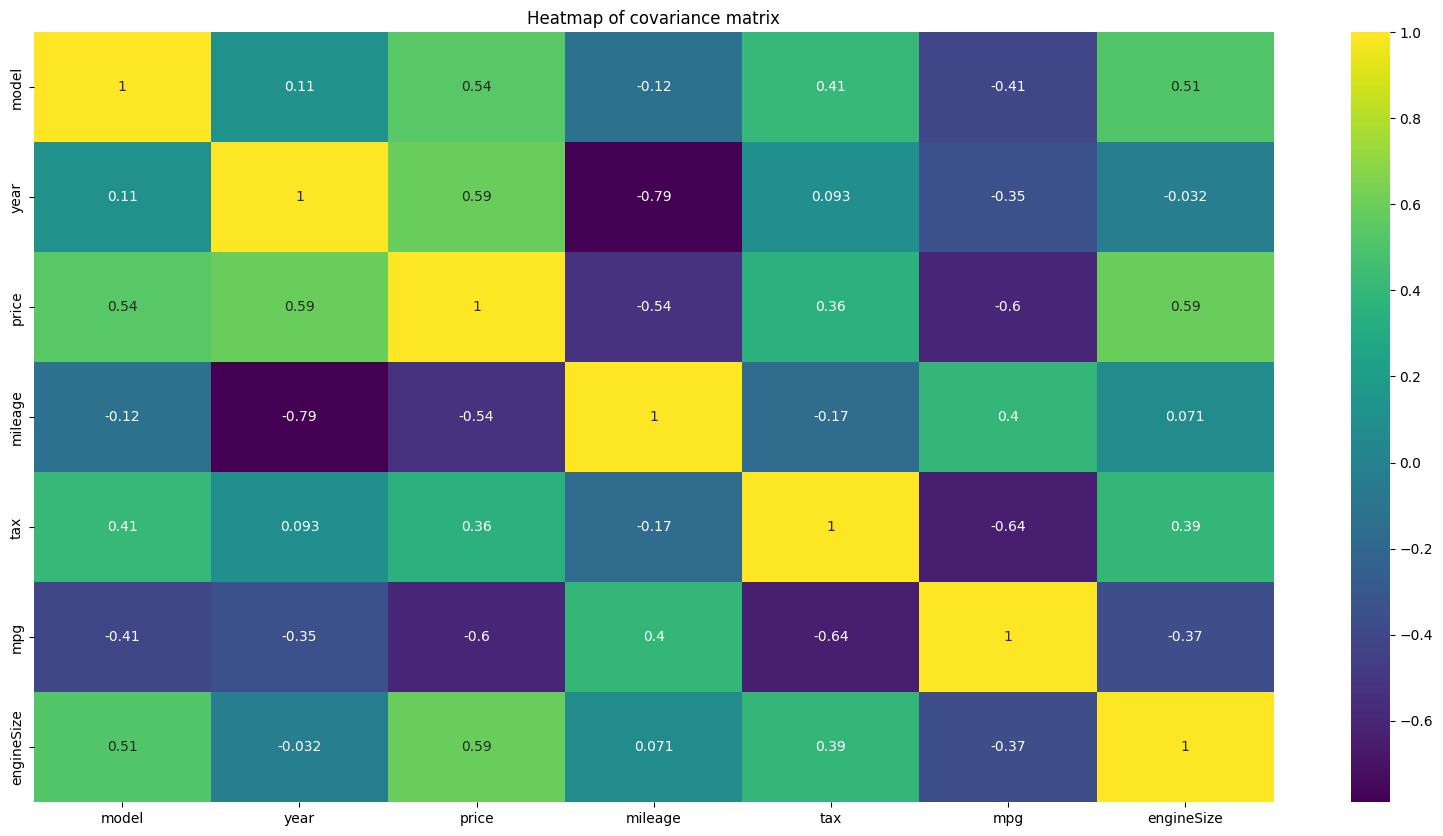

In [6]:
covariance_matrix = df.cov()
print(covariance_matrix.shape)
plt.figure(figsize=(20, 10))
sns.heatmap(covariance_matrix,cmap='viridis', annot=True)
plt.title("Heatmap of covariance matrix")
plt.show()

### Step - 3

In [7]:
eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)
eigen_values = eigen_values[::-1]
eigen_vectors = eigen_vectors[:, ::-1]
print(f'Eigen Values: {eigen_values}')
print(f'Eigen Vectors: {eigen_vectors}')

Eigen Values: [3.32920298 1.7031948  0.81988051 0.49953857 0.31816491 0.20299062
 0.12702761]
Eigen Vectors: [[-0.35523561 -0.32165511  0.27654819 -0.82328747  0.04092593 -0.01225886
   0.11932844]
 [-0.330452    0.55018271  0.1245369   0.02634508 -0.15253232 -0.63614586
   0.3794065 ]
 [-0.48935478  0.04633722  0.34955958  0.20635753  0.08719199 -0.10213239
  -0.75866723]
 [ 0.33294254 -0.54301967  0.04049591  0.09158072  0.21065065 -0.73019174
  -0.08184308]
 [-0.34770549 -0.27848091 -0.65708448 -0.00943305 -0.57395194 -0.13835073
  -0.14539097]
 [ 0.44002147  0.06275106  0.44097252 -0.13081552 -0.74324976 -0.03069125
  -0.19367959]
 [-0.31586752 -0.46403681  0.39744568  0.50332051 -0.20308074  0.17740995
   0.44820404]]


### Step - 4

In [8]:
for k in range(len(eigen_values)):
    if sum(eigen_values[:k])/sum(eigen_values) >= 0.95:
        break
top_k_eigen_vectors,top_k_eigen_values = eigen_vectors[:, :k],eigen_values[:k]
k,top_k_eigen_vectors,top_k_eigen_values

(5,
 array([[-0.35523561, -0.32165511,  0.27654819, -0.82328747,  0.04092593],
        [-0.330452  ,  0.55018271,  0.1245369 ,  0.02634508, -0.15253232],
        [-0.48935478,  0.04633722,  0.34955958,  0.20635753,  0.08719199],
        [ 0.33294254, -0.54301967,  0.04049591,  0.09158072,  0.21065065],
        [-0.34770549, -0.27848091, -0.65708448, -0.00943305, -0.57395194],
        [ 0.44002147,  0.06275106,  0.44097252, -0.13081552, -0.74324976],
        [-0.31586752, -0.46403681,  0.39744568,  0.50332051, -0.20308074]]),
 array([3.32920298, 1.7031948 , 0.81988051, 0.49953857, 0.31816491]))

### Step - 5

In [9]:
total_variance = np.sum(eigen_values)
explained_variance_per_component = eigen_values / total_variance
cumul_explained_variance = np.cumsum(explained_variance_per_component)

print(f'Eigen Vals: {eigen_values}')
print(f'Total Variance: {total_variance}')
print(f'Explained Variance per Component:\n{explained_variance_per_component}')
print(f'Cumulative Explained Variance:\n{cumul_explained_variance}')

Eigen Vals: [3.32920298 1.7031948  0.81988051 0.49953857 0.31816491 0.20299062
 0.12702761]
Total Variance: 7.0
Explained Variance per Component:
[0.47560043 0.24331354 0.11712579 0.07136265 0.04545213 0.02899866
 0.0181468 ]
Cumulative Explained Variance:
[0.47560043 0.71891397 0.83603976 0.90740241 0.95285454 0.9818532
 1.        ]


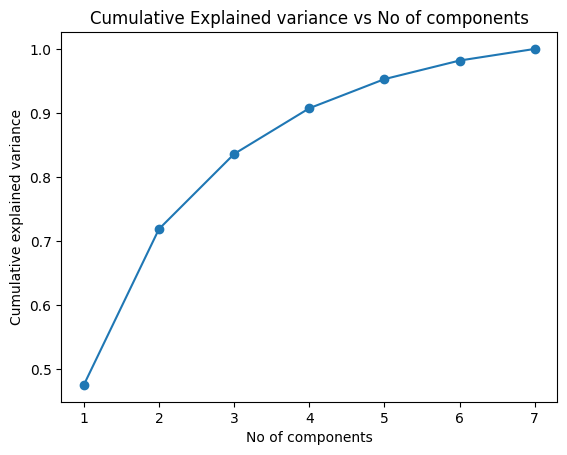

In [10]:
plt.xlabel("No of components")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative Explained variance vs No of components")
plt.plot(range(1,len(cumul_explained_variance)+1), cumul_explained_variance, marker='o')
plt.show()

### Step - 6

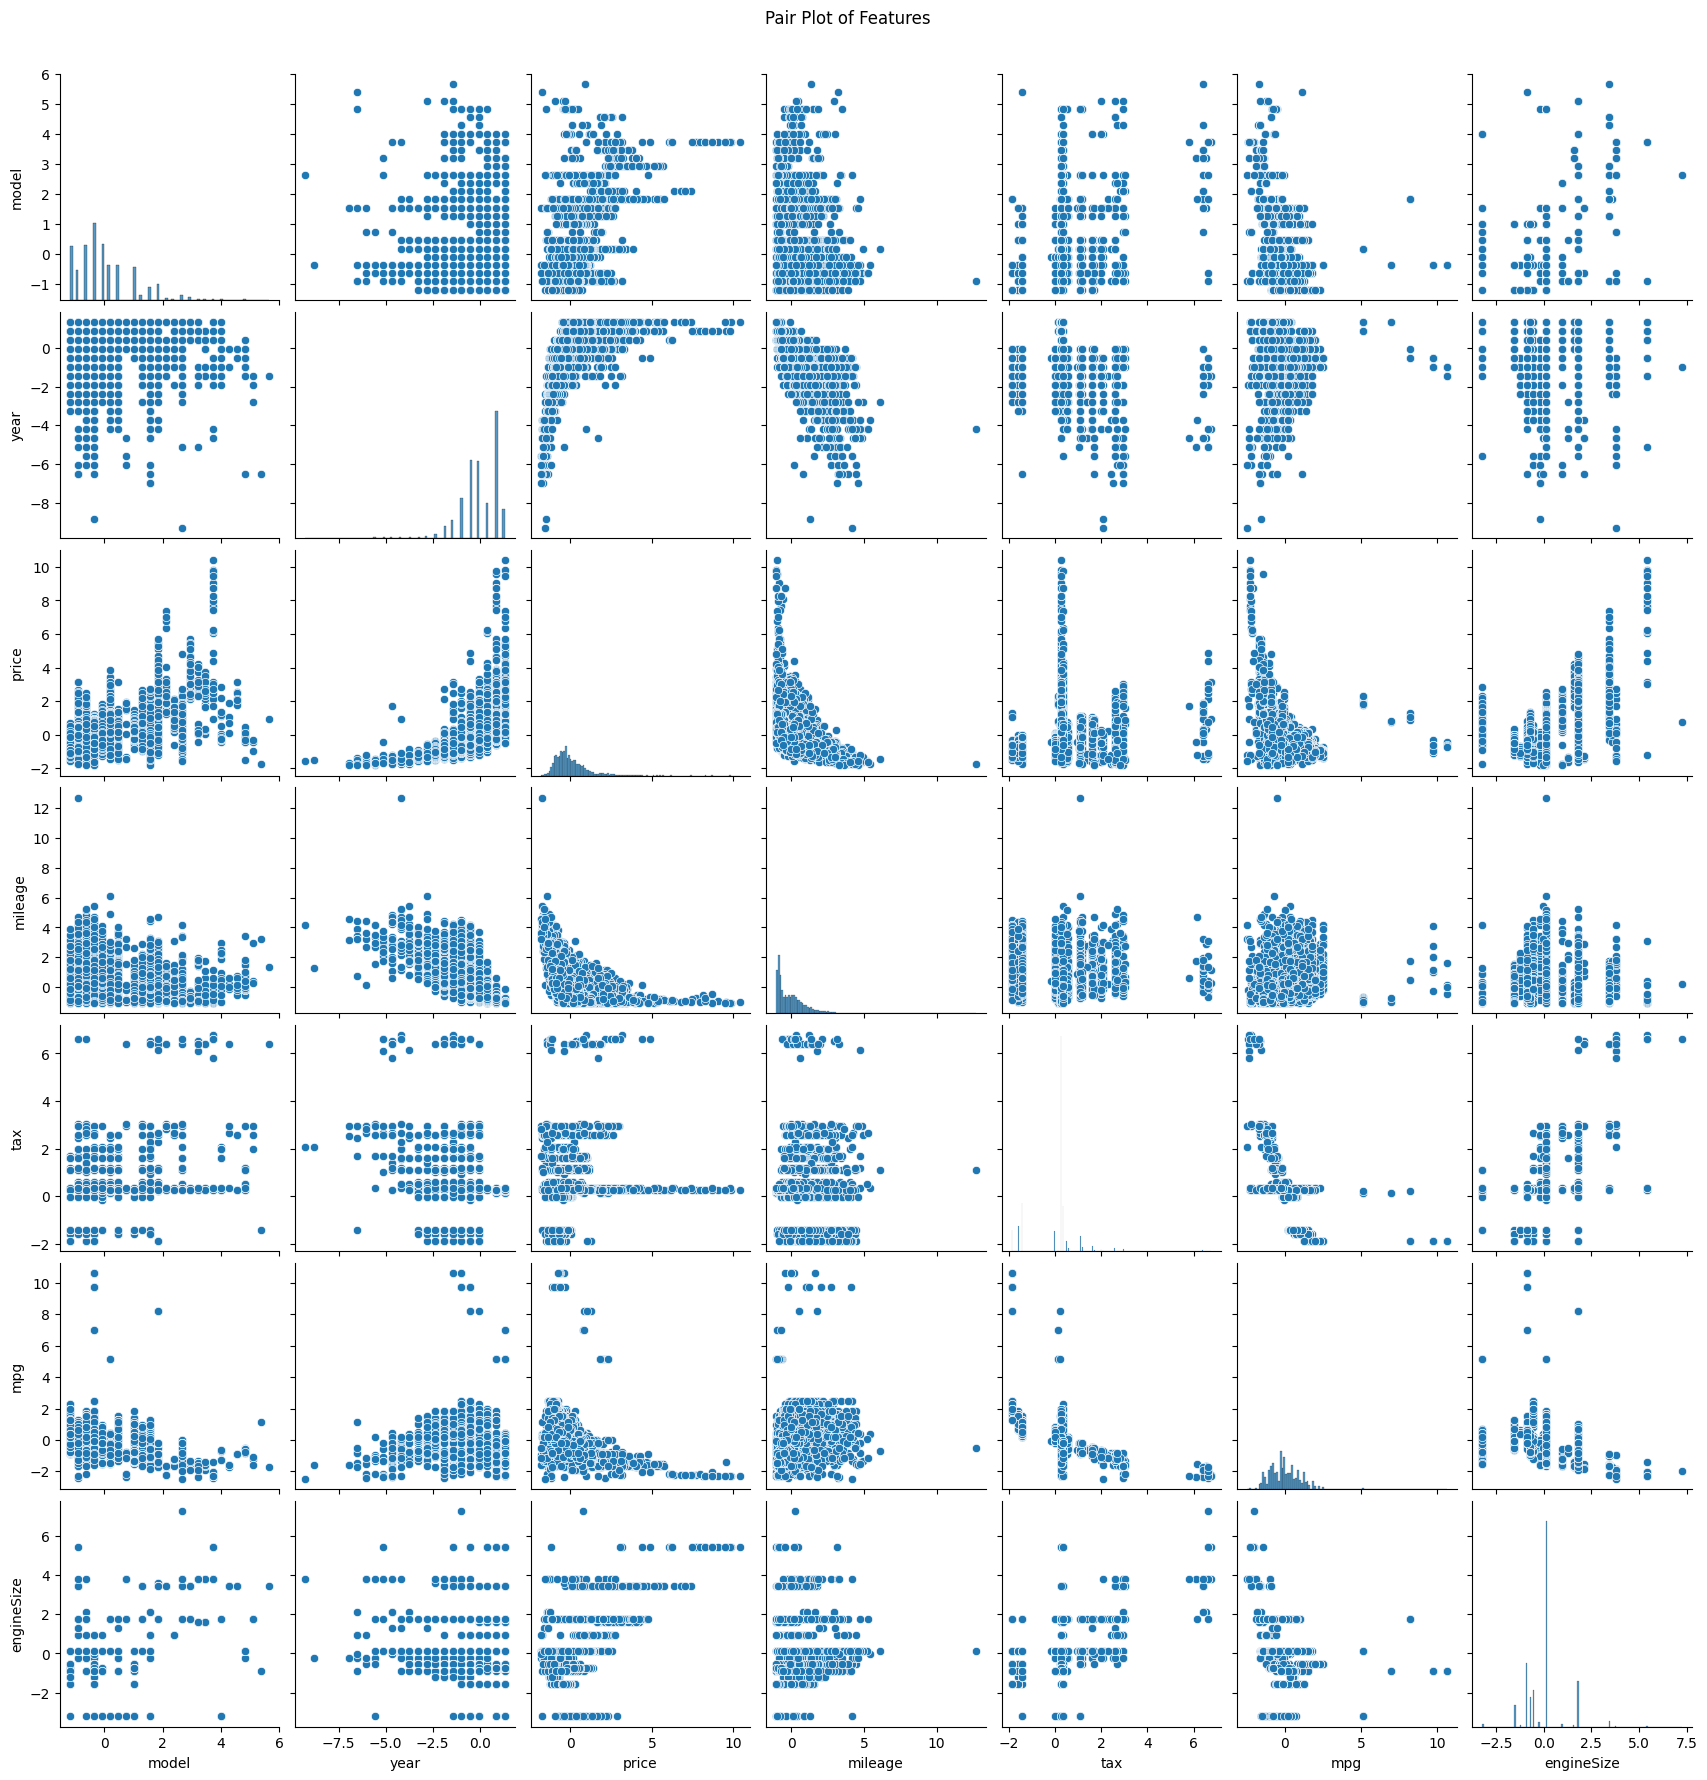

In [11]:
pair_plot = sns.pairplot(df)
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

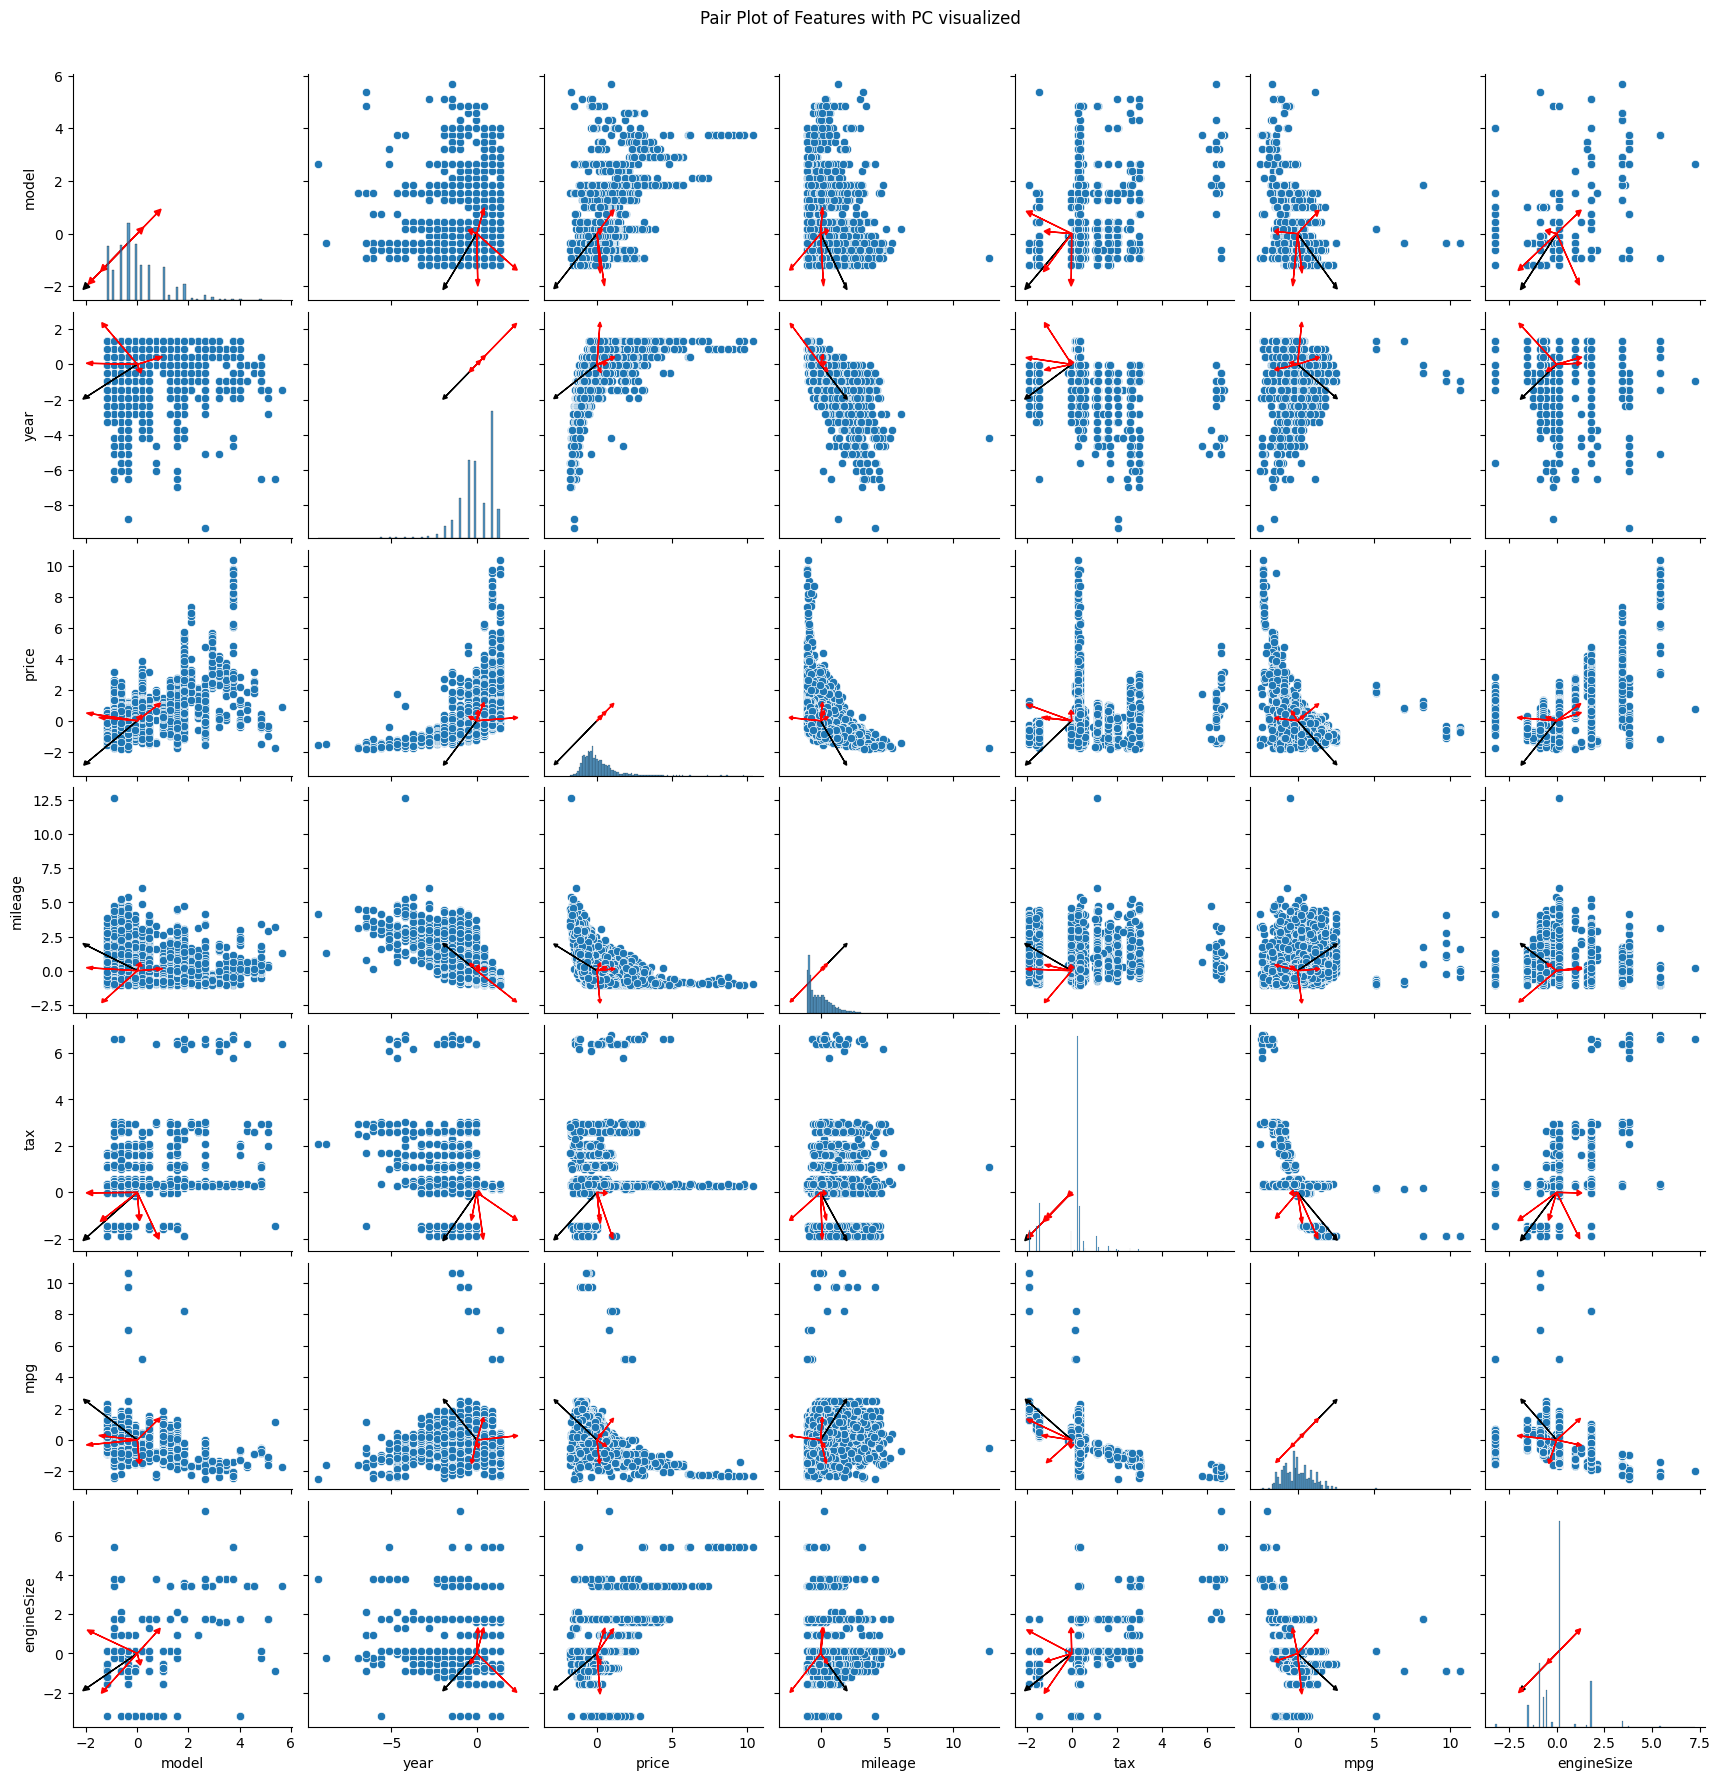

In [12]:
pairplot = sns.pairplot(df)
for i,ax in enumerate(pairplot.axes.flatten()):
    l,r = i%7,i//7
    for j in range(k):
        scale = 3*np.sqrt(top_k_eigen_values[j])
        color = 'k' if j==0 else 'r'
        ax.arrow(0, 0,scale*top_k_eigen_vectors[l][j], scale*top_k_eigen_vectors[r][j], head_width=0.25, head_length=0.25, fc=color, ec=color)

plt.suptitle("Pair Plot of Features with PC visualized", y=1.02)
plt.show()